## <font color='green'>A special thanks and credits to all my mentors for helping me constantly to progress technically</font>
## Jupyter notebook prepared, arranged and executed by <font color='red'>Karthi Balasundaram</font> , <font color='blue'> that classifies set of 10 birds using tensorflow library.</font>

In [1]:
#making a note of the initial starting time
import datetime
a = datetime.datetime.now().replace(microsecond=0)
print(a)

2021-10-05 21:02:29


In [2]:
#importing all necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import PIL
import zipfile
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
#tf.keras.utils.load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%load_ext tensorboard
import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
img = image.load_img("/Users/karthibalasundaram/Downloads/Birds-Dataset/Train/FLAME TANAGER/021.jpg")

In [4]:
cv2.imread("/Users/karthibalasundaram/Downloads/Birds-Dataset/Train/FLAME TANAGER/027.jpg").shape

(224, 224, 3)

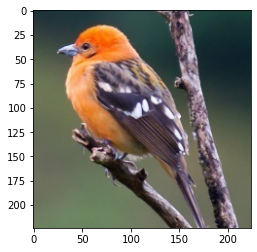

In [5]:
#checking whether the path is read
plt.imshow(img)

In [6]:
#rescaling the train ansd validation images to (0-1)
train = ImageDataGenerator(rescale =1/255)
validation = ImageDataGenerator(rescale =1/255)

In [7]:
#defining train and validation datasets
train_dataset = train.flow_from_directory('/Users/karthibalasundaram/Downloads/Birds-Dataset/Train',
                                          target_size=(200,200))
validation_dataset = validation.flow_from_directory('/Users/karthibalasundaram/Downloads/Birds-Dataset/Validation',
                                          target_size=(200,200))

Found 1160 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [8]:
train_dataset.class_indices

{'FLAME TANAGER': 0,
 'GOULDIAN FINCH': 1,
 'INDIGO BUNTING': 2,
 'LILAC ROLLER': 3,
 'MALACHITE KINGFISHER': 4,
 'NICOBAR PIGEON': 5,
 'PAINTED BUNTIG': 6,
 'PEACOCK': 7,
 'RAINBOW LORIKEET': 8,
 'TAIWAN MAGPIE': 9}

In [9]:
#printing the train dataset classes
train_dataset.classes

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [10]:
#printing the validation dataset classes
validation_dataset.class_indices

{'FLAME TANAGER': 0,
 'GOULDIAN FINCH': 1,
 'INDIGO BUNTING': 2,
 'LILAC ROLLER': 3,
 'MALACHITE KINGFISHER': 4,
 'NICOBAR PIGEON': 5,
 'PAINTED BUNTIG': 6,
 'PEACOCK': 7,
 'RAINBOW LORIKEET': 8,
 'TAIWAN MAGPIE': 9}

In [11]:
#defining the sequential model
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape =(200,200,3)),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dropout(0.4),
                             tf.keras.layers.Dense(512,activation='relu'),
                             
                             tf.keras.layers.Dense(10,activation='softmax')
                             
])
#path for saving logs
path = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)

2021-10-05 21:02:38.798190: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-05 21:02:38.915426: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-05 21:02:38.915448: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-05 21:02:38.915542: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


In [12]:
#displaying the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       7

In [13]:
#compiling the model using optimizer Adam
model.compile(optimizer=Adam(learning_rate=0.001),
 loss='categorical_crossentropy',
 metrics = ['acc'])


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)

2021-10-05 21:02:38.982591: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-05 21:02:38.982615: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-05 21:02:38.983001: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


In [14]:
#training the model
model_fit = model.fit(train_dataset, epochs=20, validation_data= validation_dataset, callbacks=[tensorboard_callback])

2021-10-05 21:02:39.956080: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
 1/37 [..............................] - ETA: 1:35 - loss: 2.3270 - acc: 0.1875

2021-10-05 21:02:43.125488: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-05 21:02:43.125526: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


 2/37 [>.............................] - ETA: 47s - loss: 2.3650 - acc: 0.2188 

2021-10-05 21:02:44.083554: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-05 21:02:44.086228: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-05 21:02:44.092708: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20211005-210238/train/plugins/profile/2021_10_05_21_02_44

2021-10-05 21:02:44.096948: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/20211005-210238/train/plugins/profile/2021_10_05_21_02_44/Karthis-MacBook-Pro.local.trace.json.gz
2021-10-05 21:02:44.104804: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20211005-210238/train/plugins/profile/2021_10_05_21_02_44

2021-10-05 21:02:44.106795: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs/fit/20211005-210238/train/plugins/

37/37 [==============================] - 37s 963ms/step - loss: 1.9036 - acc: 0.3405 - val_loss: 1.2880 - val_acc: 0.6350
Epoch 2/20
37/37 [==============================] - 30s 807ms/step - loss: 1.0057 - acc: 0.6776 - val_loss: 0.9581 - val_acc: 0.6650
Epoch 3/20
37/37 [==============================] - 28s 760ms/step - loss: 0.6290 - acc: 0.7957 - val_loss: 0.6990 - val_acc: 0.7800
Epoch 4/20
37/37 [==============================] - 32s 855ms/step - loss: 0.4879 - acc: 0.8405 - val_loss: 0.6653 - val_acc: 0.7900
Epoch 5/20
37/37 [==============================] - 30s 797ms/step - loss: 0.3099 - acc: 0.8897 - val_loss: 0.5961 - val_acc: 0.8100
Epoch 6/20
37/37 [==============================] - 32s 858ms/step - loss: 0.2060 - acc: 0.9345 - val_loss: 0.6530 - val_acc: 0.8100
Epoch 7/20
37/37 [==============================] - 33s 886ms/step - loss: 0.1606 - acc: 0.9491 - val_loss: 0.5535 - val_acc: 0.8300
Epoch 8/20
37/37 [==============================] - 34s 913ms/step - loss: 0.108

In [15]:
#defining a function to predict/TEST the trained model
def test():
    for i in range(10):
        if pred [0][i] ==1:
            break
            print("Model predicted class is",i)
    if i ==0:
        print("Model predicted bird name is FLAME TANAGER")
    elif i ==1:
        print("Model predicted bird name is GOULDIAN FINCH")
    elif i ==2:
        print("Model predicted bird name is INDIGO BUNTING")
    elif i ==3:
        print("Model predicted bird name is LILAC ROLLER")
    elif i ==4:
        print("Model predicted bird name is MALACHITE KINGFISHER")
    elif i == 5:
        print("Model predicted bird name is NICOBAR PIGEON")
    elif i==6:
        print("Model predicted bird name is PAINTED BUNTIG")
    elif i ==7:
        print("Model predicted bird name is PEACOCK")
    elif i ==8:
        print("Model predicted bird name is RAINBOW LORIKEET")
    else:
        print("Model predicted bird name is TAIWAN MAGPIE")
    print("**************************************************************")

Testing data local path : /Users/karthibalasundaram/Downloads/Birds-Dataset/Test/
Name of the testing bird Lilac-breasted-Roller-227RC.jpeg


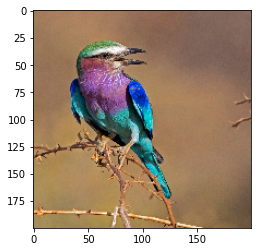

Predicted value array [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Model predicted bird name is LILAC ROLLER
**************************************************************
Name of the testing bird Gouldian-finch-in-tree.jpeg


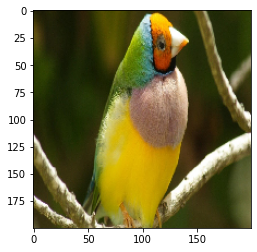

Predicted value array [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Model predicted bird name is GOULDIAN FINCH
**************************************************************
Name of the testing bird taiwan1.jpeg


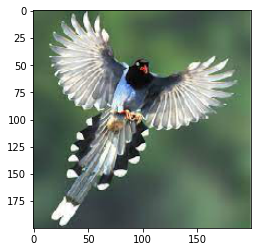

Predicted value array [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Model predicted bird name is TAIWAN MAGPIE
**************************************************************
Name of the testing bird peacock.jpeg


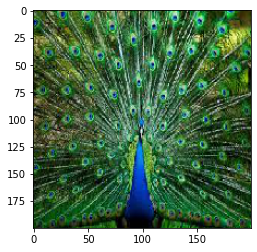

Predicted value array [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Model predicted bird name is PEACOCK
**************************************************************
Name of the testing bird indigo1.jpeg


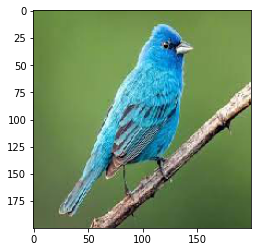

Predicted value array [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Model predicted bird name is INDIGO BUNTING
**************************************************************
Name of the testing bird rainbow.jpeg


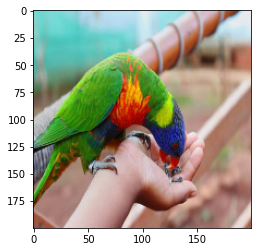

Predicted value array [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Model predicted bird name is RAINBOW LORIKEET
**************************************************************
Name of the testing bird Flame.jpeg


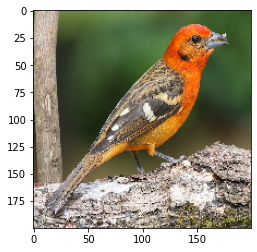

Predicted value array [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Model predicted bird name is FLAME TANAGER
**************************************************************
Name of the testing bird malachite.jpeg


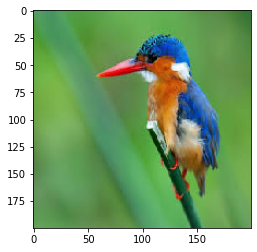

Predicted value array [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Model predicted bird name is MALACHITE KINGFISHER
**************************************************************
Name of the testing bird painted-bunting-1-cmoore.jpeg


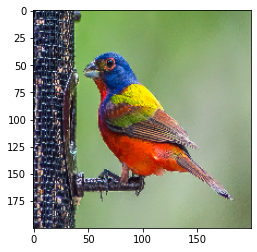

Predicted value array [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Model predicted bird name is PAINTED BUNTIG
**************************************************************
Name of the testing bird nicobar.jpg


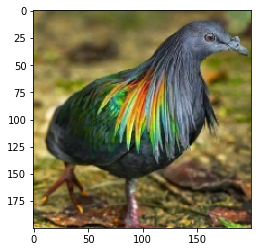

Predicted value array [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Model predicted bird name is NICOBAR PIGEON
**************************************************************


In [24]:
#predicting the model and the results are displayed below
pred_dir_path = '/Users/karthibalasundaram/Downloads/Birds-Dataset/Test/'
print("Testing data local path :",pred_dir_path)
for j in os.listdir(pred_dir_path):
    if j.startswith('.'):
        continue
    print("Name of the testing bird",j)
    img = image.load_img(pred_dir_path+ '//'+ j, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis =0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=10)
    print("Predicted value array",pred)
    test()

In [17]:
#calling the tensor board
%tensorboard --logdir logs/fit

In [18]:
#saving the model for easier access
model.save('model.h5')

In [21]:
b = datetime.datetime.now().replace(microsecond=0)
print(b)
print("Total time for execution :",b-a)

2021-10-05 21:14:19
Total time for execution : 0:11:50
